In [ ]:
#Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# EDA + Feature Engineering


In [44]:
data = pd.read_csv(r"C:\Users\sebal\OneDrive\Documentos\vscode\proyecto\Student Depression Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [45]:
# Verificar si hay datos nulos
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

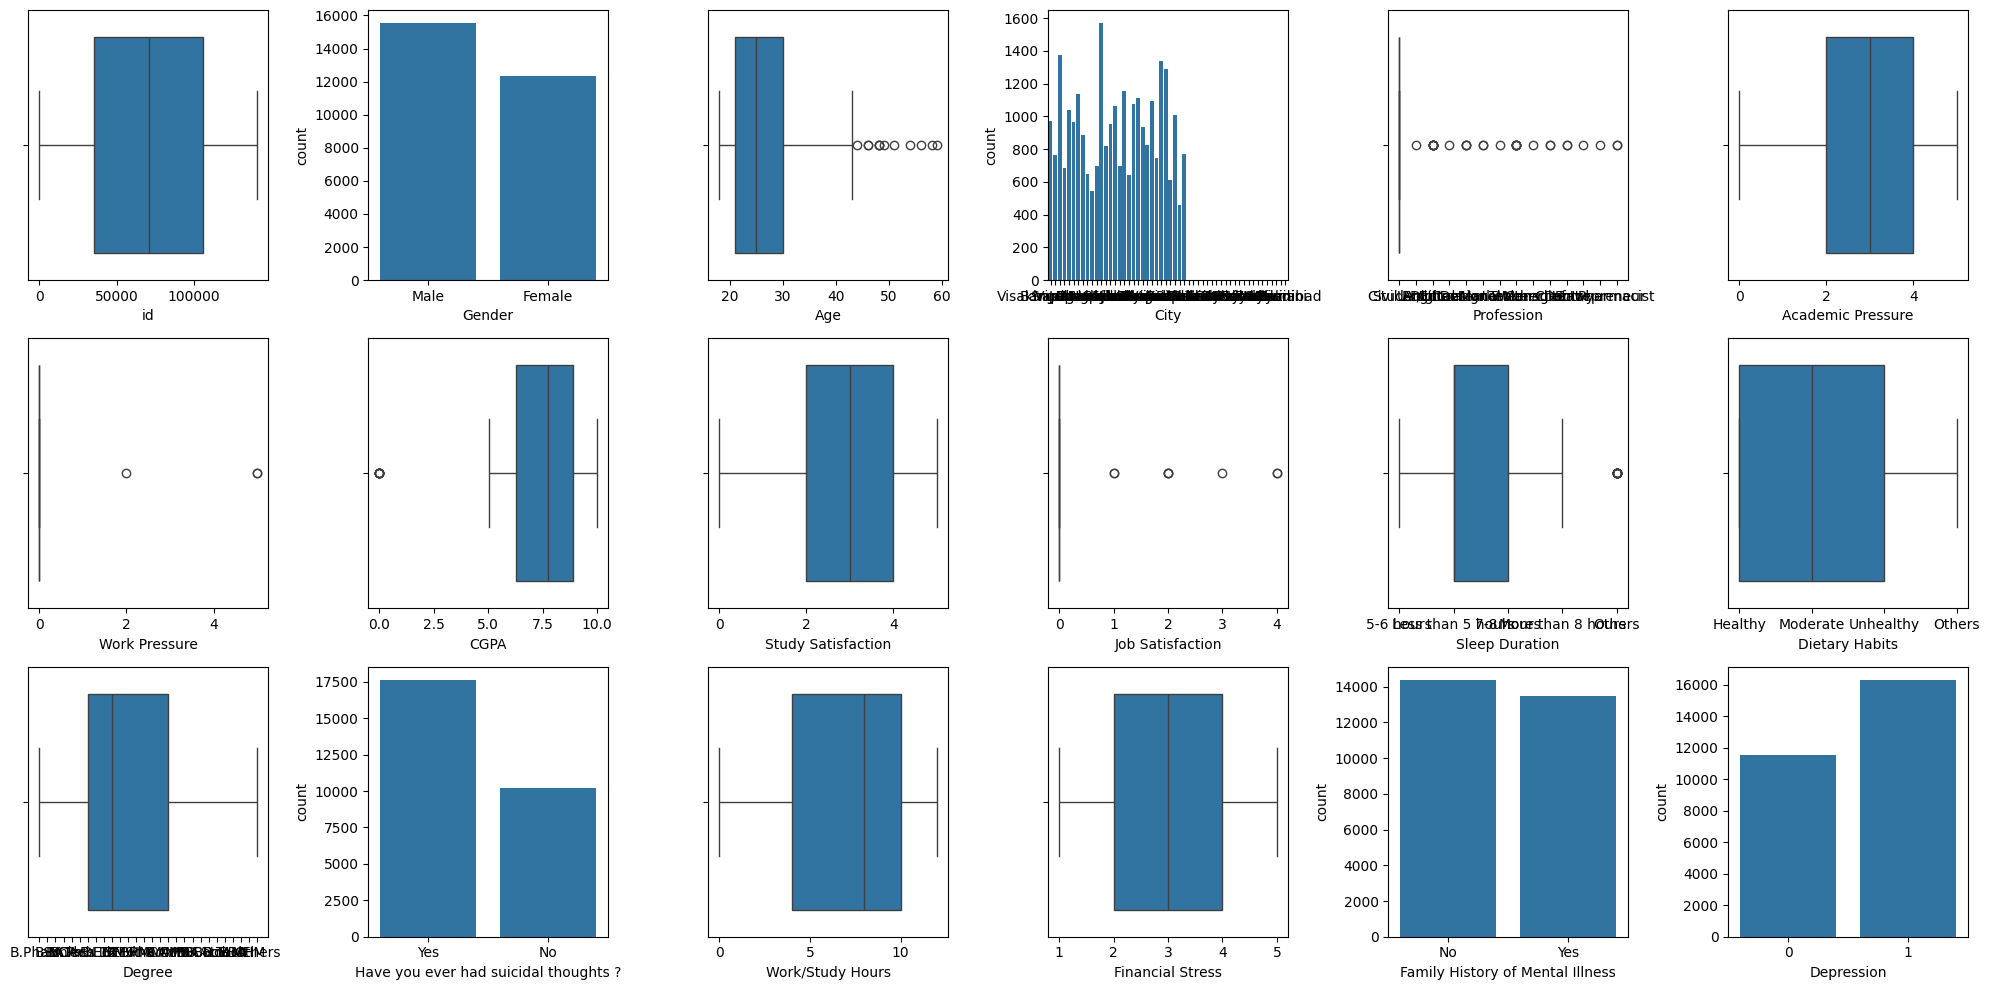

In [46]:
#Visualizar las feauteres

plt.figure(figsize=(20,10)) 
for col in data.columns: 
    plt.subplot(3 , 6, data.columns.get_loc(col) +1 ) 
    if col == "Gender": 
        sns.countplot(data, x = "Gender")
    elif col == "City":
        sns.countplot(data, x = "City")
    elif col == "Have you ever had suicidal thoughts ?": 
        sns.countplot(data, x = "Have you ever had suicidal thoughts ?")
    elif col == "Family History of Mental Illness": 
        sns.countplot(data, x = "Family History of Mental Illness")
    elif col == "Depression": 
        sns.countplot(data, x = "Depression")
    else:
        sns.boxplot(data, x = col)
    
    plt.tight_layout()
    plt.show

### Limpieza de datos y Feature Selection

In [47]:
#Dataframe para ver los value counts
value_counts_df = pd.DataFrame(data[["Job Satisfaction", "Work Pressure"]].value_counts().reset_index(name='value counts'))
value_counts_df

,Job Satisfaction,Work Pressure,value counts
0,0.0,0.0,27893
1,2.0,0.0,3
2,4.0,5.0,2
3,1.0,0.0,1
4,1.0,2.0,1
5,3.0,0.0,1


In [48]:
#Eliminamos las columnas que no son relevantes para nuestro estudio (argumentar pq las eliminamos en el README)
data.drop(columns=["id", "Profession", "Job Satisfaction","Work Pressure", "Degree", "City"], inplace=True)
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,Yes,10.0,5.0,No,1


In [49]:
#Identificamos 4 variables categoricas, pasamos 3 de ellas a binario
data["Gender"] = (data["Gender"] == "Male").astype(int) 
#1 es masculino, 0 es femenino

data["Have you ever had suicidal thoughts ?"] = (data["Have you ever had suicidal thoughts ?"] == "Yes").astype(int) 
data["Family History of Mental Illness"] = (data["Family History of Mental Illness"] == "Yes").astype(int)
#1 si es Yes, 0 si es No, para ambas columnas

In [50]:
data["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [51]:
#eliminar valores Others
data = data[data["Sleep Duration"] != "Others"] 

#Reemplazar los valores por números.
data["Sleep Duration"] = data["Sleep Duration"].replace({
    "Less than 5 hours": 4.5,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9.0
})

C:\Users\sebal\AppData\Local\Temp\ipykernel_18968\2876658159.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Sleep Duration"] = data["Sleep Duration"].replace({
C:\Users\sebal\AppData\Local\Temp\ipykernel_18968\2876658159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sleep Duration"] = data["Sleep Duration"].replace({


In [52]:
#Replicamos para la columna "Dieraty Habits"
data["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10309
Moderate      9914
Healthy       7648
Others          12
Name: count, dtype: int64

In [53]:
#eliminar valores Others
data = data[data["Dietary Habits"] != "Others"] 

#Reemplazar los valores por números.
data["Dietary Habits"] = data["Dietary Habits"].replace({
    "Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2,
})
data.head(5)

C:\Users\sebal\AppData\Local\Temp\ipykernel_18968\1465282914.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Dietary Habits"] = data["Dietary Habits"].replace({


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,5.5,2,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,5.5,1,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,4.5,2,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,7.5,1,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,5.5,1,1,1.0,1.0,0,0


<Axes: xlabel='Age'>

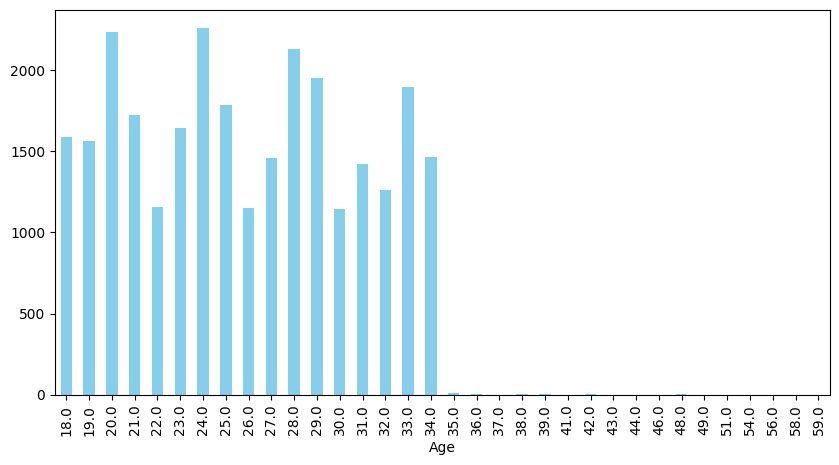

In [54]:
#Gráfico para ver la distribución de la edad
data["Age"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color="skyblue")

In [55]:
 #Eliminar datos irrelevantes (explicar en el README)
data = data[data['Age'] < 35.0]

In [60]:
# Eliminar outliers de la columna "CGPA" usando el método IQR
Q1 = data['CGPA'].quantile(0.25)
Q3 = data['CGPA'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos sin outliers
data = data[(data['CGPA'] >= Q1 - 1.5 * IQR) & (data['CGPA'] <= Q3 + 1.5 * IQR)]

In [62]:
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,5.5,2,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,5.5,1,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,4.5,2,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,7.5,1,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,5.5,1,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,5.75,5.0,5.5,0,1,7.0,1.0,1,0
27897,1,27.0,2.0,9.40,3.0,4.5,2,0,0.0,3.0,1,0
27898,1,31.0,3.0,6.61,4.0,5.5,0,0,12.0,2.0,0,0
27899,0,18.0,5.0,6.88,2.0,4.5,2,1,10.0,5.0,0,1


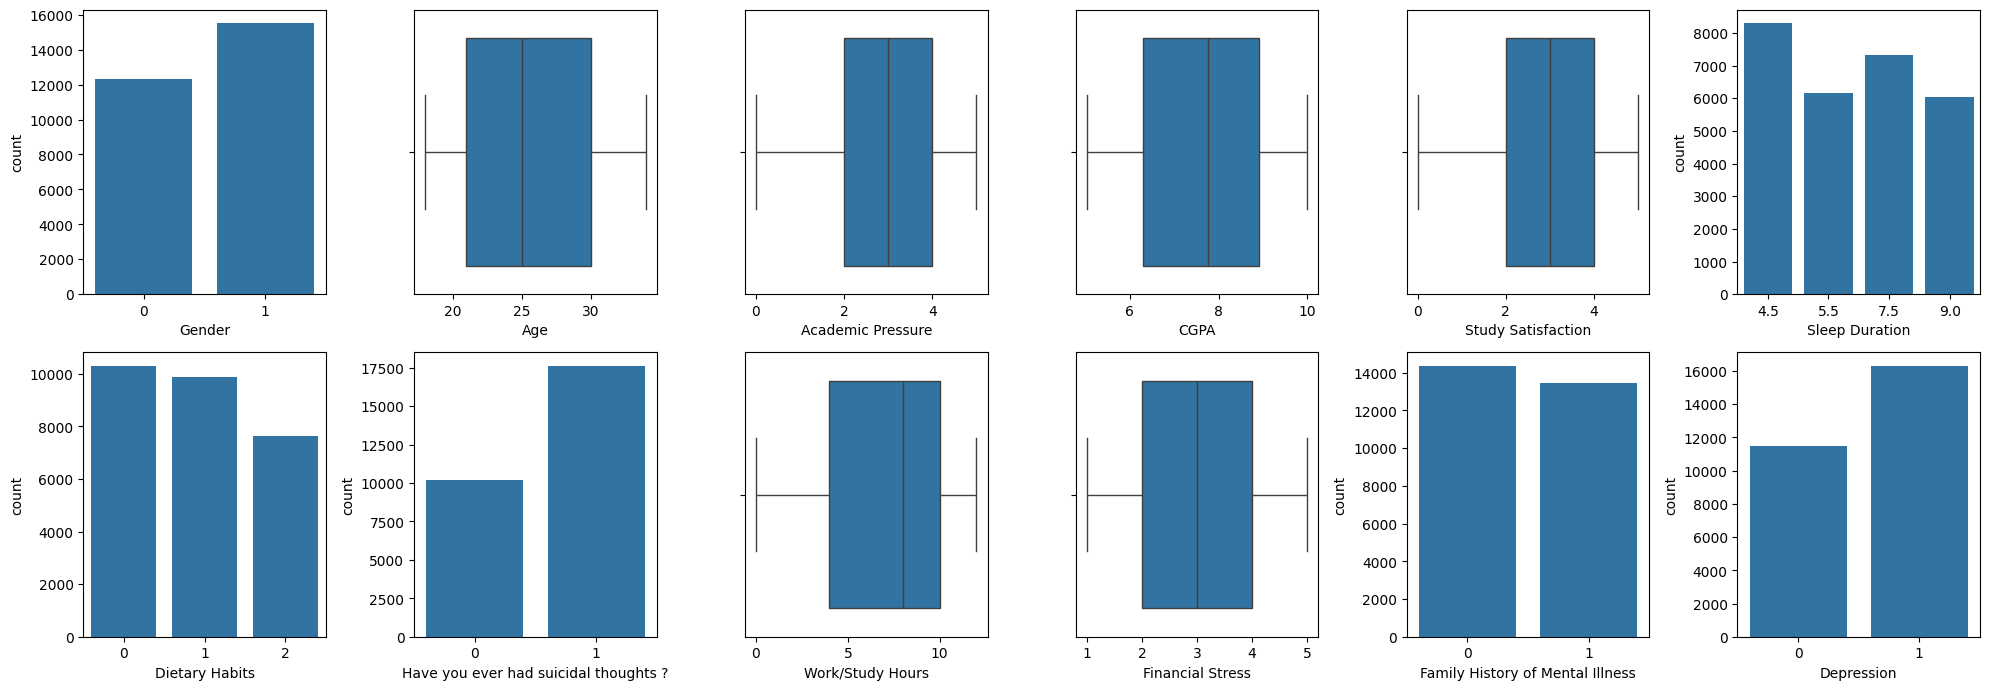

In [ ]:
#Mostrar features con los datos limpios
plt.figure(figsize=(20,10))
for col in data.columns:
    plt.subplot(3 , 6, data.columns.get_loc(col) +1 ) 
    if col == "Gender":
        sns.countplot(data, x = "Gender")
    elif col == "Sleep Duration":
        sns.countplot(data, x = "Sleep Duration")
    elif col == "Dietary Habits":
        sns.countplot(data, x = "Dietary Habits")
    elif col == "Have you ever had suicidal thoughts ?":
        sns.countplot(data, x = "Have you ever had suicidal thoughts ?")
    elif col == "Family History of Mental Illness": 
        sns.countplot(data, x = "Family History of Mental Illness")
    elif col == "Depression":
        sns.countplot(data, x = "Depression")
    else:
        sns.boxplot(data, x = col) 
    plt.tight_layout() 
    plt.show

Analisis de los datos

In [58]:
X = data.drop(columns =["Depression"])
y = data["Depression"]

<Axes: >

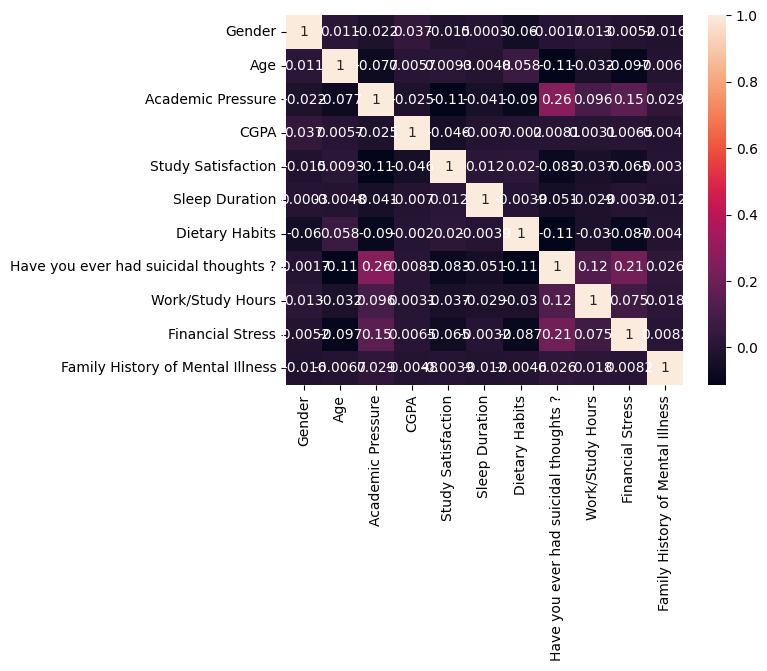

In [65]:
correlation_matrix = X.corr() #Calcula la matriz de correlacion
sns.heatmap(correlation_matrix, annot=True) #Plots heatmap
#Redundancia en las features

In [70]:
from sklearn.preprocessing import StandardScaler #Importar StandardScaler
from sklearn.decomposition import PCA

KeyError: '__reduce_cython__'

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X) #Normalizar los dato

pca = PCA() #Crear un objeto PCA
pca.fit(X) #Ajustar el PCA a los datos
pca.explained_variance_ratio_


KeyError: '__reduce_cython__'

In [ ]:
exp_variance = pd.DataFrame(pca.explained_variance_ratio_) #Gets explained variance
exp_variance["component"] = exp_variance.index + 1 #Assign a PC number
exp_variance = exp_variance.rename(columns={0: "explained_variance"}) #Rename 0 column to explained_variance
sns.barplot(exp_variance, x="component", y = "explained_variance") #Plot explained variance
plt.xticks([]) #Drops xticks
plt.show() #Display